In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-football-leagues-scorers/Data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
df=pd.read_csv("/kaggle/input/top-football-leagues-scorers/Data.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [3]:

df.duplicated


<bound method DataFrame.duplicated of           Country      League   Club       Player Names  Matches_Played  \
0           Spain     La Liga  (BET)    Juanmi Callejon              19   
1           Spain     La Liga  (BAR)  Antoine Griezmann              36   
2           Spain     La Liga  (ATL)        Luis Suarez              34   
3           Spain     La Liga  (CAR)       Ruben Castro              32   
4           Spain     La Liga  (VAL)      Kevin Gameiro              21   
..            ...         ...    ...                ...             ...   
655   Netherlands  Eredivisie  (UTR)        Gyrano Kerk              24   
656   Netherlands  Eredivisie  (AJA)      Quincy Promes              18   
657   Netherlands  Eredivisie  (PSV)    Denzel Dumfries              25   
658   Netherlands  Eredivisie    NaN    Cyriel Dessers               26   
659   Netherlands  Eredivisie  (PSV)         Cody Gakpo              14   

     Substitution   Mins  Goals     xG  xG Per Avg Match  Sho

In [4]:
df.loc[(df.League=='Premier League')&(df.Year==2017)]

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year


In [5]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [6]:
duplicated_columns=df.duplicated()
print(df[duplicated_columns])


Empty DataFrame
Columns: [Country, League, Club, Player Names, Matches_Played, Substitution , Mins, Goals, xG, xG Per Avg Match, Shots, OnTarget, Shots Per Avg Match, On Target Per Avg Match, Year]
Index: []


In [7]:
removing_duplicate_value=df.drop_duplicates()
print(removing_duplicate_value)

          Country      League   Club       Player Names  Matches_Played  \
0           Spain     La Liga  (BET)    Juanmi Callejon              19   
1           Spain     La Liga  (BAR)  Antoine Griezmann              36   
2           Spain     La Liga  (ATL)        Luis Suarez              34   
3           Spain     La Liga  (CAR)       Ruben Castro              32   
4           Spain     La Liga  (VAL)      Kevin Gameiro              21   
..            ...         ...    ...                ...             ...   
655   Netherlands  Eredivisie  (UTR)        Gyrano Kerk              24   
656   Netherlands  Eredivisie  (AJA)      Quincy Promes              18   
657   Netherlands  Eredivisie  (PSV)    Denzel Dumfries              25   
658   Netherlands  Eredivisie    NaN    Cyriel Dessers               26   
659   Netherlands  Eredivisie  (PSV)         Cody Gakpo              14   

     Substitution   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  \
0               16  18

In [8]:
removing_duplicate_value.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [9]:
league_data=df.groupby('League').get_group('La Liga')
print(league_data)


    Country   League   Club       Player Names  Matches_Played  Substitution   \
0     Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1     Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2     Spain  La Liga  (ATL)        Luis Suarez              34              1   
3     Spain  La Liga  (CAR)       Ruben Castro              32              3   
4     Spain  La Liga  (VAL)      Kevin Gameiro              21             10   
..      ...      ...    ...                ...             ...            ...   
535   Spain  La Liga  (CEL)         Iago Aspas              11              0   
536   Spain  La Liga  (EIB)        Kike GarcIa               9              1   
537   Spain  La Liga  (GET)    Angel Rodriguez               3              6   
538   Spain  La Liga  (BAR)          Ansu Fati               6              1   
539   Spain  La Liga  (VIL)      Gerard Moreno               9              0   

     Mins  Goals     xG  xG

To Visualise the Null Values present in the dataset

<Axes: >

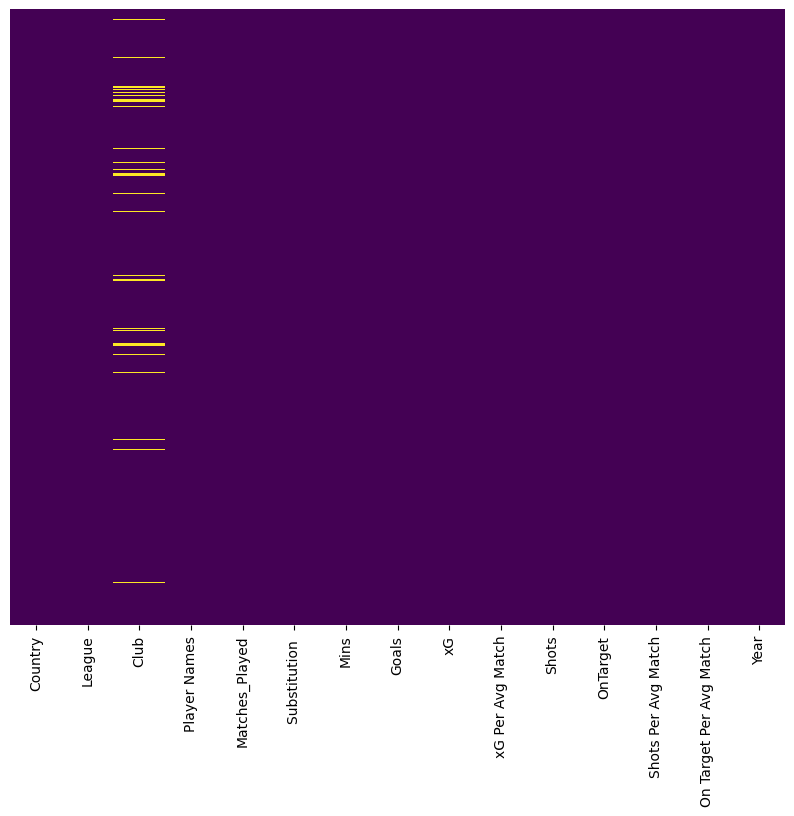

In [10]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
rows_with_null_info = df[df.isnull().any(axis=1)]
print(rows_with_null_info)

          Country                          League Club         Player Names  \
10          Spain                         La Liga  NaN              Aduriz    
51        Germany                      Bundesliga  NaN          Mario Gomez   
82         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Robinho    
83         Brazil  Campeonato Brasileiro SÃ©rie A  NaN              Kempes    
85         Brazil  Campeonato Brasileiro SÃ©rie A  NaN        Bruno Rangel    
89         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Grafite    
92         Brazil  Campeonato Brasileiro SÃ©rie A  NaN                Sassa   
96         Brazil  Campeonato Brasileiro SÃ©rie A  NaN     Kleber Gladiador   
97         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Pottker    
98         Brazil  Campeonato Brasileiro SÃ©rie A  NaN      Jonathan Copete   
104         Spain                         La Liga  NaN         Rodrigo None   
149       Germany                      Bundesliga  N

In [12]:
df.League.unique()

array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'Campeonato Brasileiro SÃ©rie A', 'France Ligue 11',
       'France Ligue 20', 'France Ligue 2', 'France Ligue 12',
       'France Ligue 9', 'France Ligue 15', 'France Ligue 6',
       'France Ligue 3', 'France Ligue 16', 'France Ligue 14',
       'France Ligue 4', 'France Ligue 1', 'France Ligue 10',
       'France Ligue 7', 'France Ligue 13', 'France Ligue 8',
       'France Ligue 5', 'France Ligue 19', 'France Ligue 18',
       'France Ligue 17', 'MLS', 'Primeira Liga', 'Eredivisie'],
      dtype=object)

In [13]:
selected_leagues = ['La Liga', 'Serie A', 'Bundesliga', 'Premier League', 'MLS', 'Primeira Liga', 'Eredivisie','France Ligue 1']
df_selected_leagues = df[df['League'].isin(selected_leagues)]
print(df_selected_leagues)

          Country      League   Club       Player Names  Matches_Played  \
0           Spain     La Liga  (BET)    Juanmi Callejon              19   
1           Spain     La Liga  (BAR)  Antoine Griezmann              36   
2           Spain     La Liga  (ATL)        Luis Suarez              34   
3           Spain     La Liga  (CAR)       Ruben Castro              32   
4           Spain     La Liga  (VAL)      Kevin Gameiro              21   
..            ...         ...    ...                ...             ...   
655   Netherlands  Eredivisie  (UTR)        Gyrano Kerk              24   
656   Netherlands  Eredivisie  (AJA)      Quincy Promes              18   
657   Netherlands  Eredivisie  (PSV)    Denzel Dumfries              25   
658   Netherlands  Eredivisie    NaN    Cyriel Dessers               26   
659   Netherlands  Eredivisie  (PSV)         Cody Gakpo              14   

     Substitution   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  \
0               16  18

In [14]:
df_selected_leagues['League'].unique()


array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'France Ligue 1', 'MLS', 'Primeira Liga', 'Eredivisie'],
      dtype=object)

In [15]:
premier_league_data = df_selected_leagues.groupby('League').get_group('Premier League')
premier_league_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
60,England,Premier League,(INT),Alexis Sanchez,36,2,3385,24,19.24,0.54,129,49,3.62,1.38,2016
61,England,Premier League,(INT),Romelu Lukaku,36,1,3448,25,18.15,0.50,110,53,3.03,1.46,2016
62,England,Premier League,(TOT),Harry Kane,29,1,2636,29,18.87,0.68,110,58,3.96,2.09,2016
63,England,Premier League,(LEI),Jamie Vardy,33,2,2938,13,9.28,0.30,54,26,1.75,0.84,2016
64,England,Premier League,(CRY),Christian Benteke,36,0,3299,15,18.40,0.53,105,38,3.02,1.09,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,England,Premier League,(BHA),Neal Maupay,9,0,786,4,6.54,0.79,25,11,3.02,1.33,2020
616,England,Premier League,(AVL),Ollie Watkins,9,0,872,6,6.43,0.70,22,9,2.40,0.98,2020
617,England,Premier League,(LIV),Sadio Mane,8,1,785,4,4.88,0.59,27,13,3.27,1.57,2020
618,England,Premier League,(MNC),Riyad Mahrez,7,0,612,4,1.93,0.30,21,10,3.26,1.55,2020


In [16]:
# Assuminging df_selected_leagues is your DataFrame
selected_leagues = ['La Liga', 'Serie A', 'Bundesliga', 'Premier League', 'MLS', 'Primeira Liga', 'Eredivisie']

# Createing an empty dictionary to store DataFrames for each league
league_data = {}

# Iterating over selected leagues
for league in selected_leagues:
    # Get data for the current league
    current_league_data = df_selected_leagues[df_selected_leagues['League'] == league]
    
    # Storing the DataFrame in the dictionary
    league_data[league] = current_league_data

# Accessing individual DataFrames, for example, Premier League data
premier_league_data = league_data['Premier League']
La_Liga_data=league_data['La Liga']
Serie_A_data=league_data['Serie A']
Bundesliga_data=league_data['Bundesliga']
MLS_data=league_data['MLS']
Primeira_Liga_data = league_data['Primeira Liga']
Eredivisie_data=league_data['Eredivisie']
premier_league_data





,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
60,England,Premier League,(INT),Alexis Sanchez,36,2,3385,24,19.24,0.54,129,49,3.62,1.38,2016
61,England,Premier League,(INT),Romelu Lukaku,36,1,3448,25,18.15,0.50,110,53,3.03,1.46,2016
62,England,Premier League,(TOT),Harry Kane,29,1,2636,29,18.87,0.68,110,58,3.96,2.09,2016
63,England,Premier League,(LEI),Jamie Vardy,33,2,2938,13,9.28,0.30,54,26,1.75,0.84,2016
64,England,Premier League,(CRY),Christian Benteke,36,0,3299,15,18.40,0.53,105,38,3.02,1.09,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,England,Premier League,(BHA),Neal Maupay,9,0,786,4,6.54,0.79,25,11,3.02,1.33,2020
616,England,Premier League,(AVL),Ollie Watkins,9,0,872,6,6.43,0.70,22,9,2.40,0.98,2020
617,England,Premier League,(LIV),Sadio Mane,8,1,785,4,4.88,0.59,27,13,3.27,1.57,2020
618,England,Premier League,(MNC),Riyad Mahrez,7,0,612,4,1.93,0.30,21,10,3.26,1.55,2020


In [17]:
La_Liga_data['Goals'].mean()

13.14

In [18]:
# Define the columns for which you want to calculate the average
average_columns = ['Matches_Played', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year']

# Creating a new set of columns for average per match
average_per_match_columns = [column + '_Per_Match' for column in average_columns]

# Creating a dictionary to store average values for each column and average per match
average_values = {}

# Iterating over the selected leagues
for league, data in league_data.items():
    # Checking if all columns are present in the DataFrame
    if set(average_columns).issubset(data.columns):
        # Calculating the average for each column
        averages = data.groupby('Year')[average_columns].mean()
        
        # Calculating the average per match for each column
        averages_per_match = averages.drop('Year', axis=1).div(averages['Matches_Played'], axis=0)
        
        # Storing the averages in the dictionary
        average_values[league] = averages.join(averages_per_match, rsuffix='_Per_Match')
    else:
        print(f"Columns {set(average_columns) - set(data.columns)} are missing for league {league}")

# Converting the dictionary to a DataFrame
average_df = pd.concat(average_values, names=['League', 'Year'])


print(average_df)


                     Matches_Played     Mins  Goals       xG  \
League         Year                                            
La Liga        2016           26.60  2384.25  15.50  12.3765   
               2017           29.50  2682.10  16.70  16.0745   
               2018           29.95  2818.95  16.05  14.7540   
               2019           28.80  2707.65  13.25  13.1235   
               2020            7.20   660.50   4.20   3.6135   
Serie A        2016           31.05  2843.35  17.45  14.1720   
               2017           31.40  2858.35  14.85  12.0550   
               2018           28.80  2718.55  14.85  12.9225   
               2019           27.05  2567.05  16.70  14.3055   
               2020            7.55   649.75   5.25   3.6140   
Bundesliga     2016           24.75  2284.55  14.25  11.9075   
               2017           23.90  2218.80  12.55  10.4285   
               2018           26.25  2442.35  14.65  12.2215   
               2019           24.55  226

In [19]:
average_df.columns

Index(['Matches_Played', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year',
       'Matches_Played_Per_Match', 'Mins_Per_Match', 'Goals_Per_Match',
       'xG_Per_Match', 'xG Per Avg Match_Per_Match', 'Shots_Per_Match',
       'OnTarget_Per_Match', 'Shots Per Avg Match_Per_Match',
       'On Target Per Avg Match_Per_Match'],
      dtype='object')

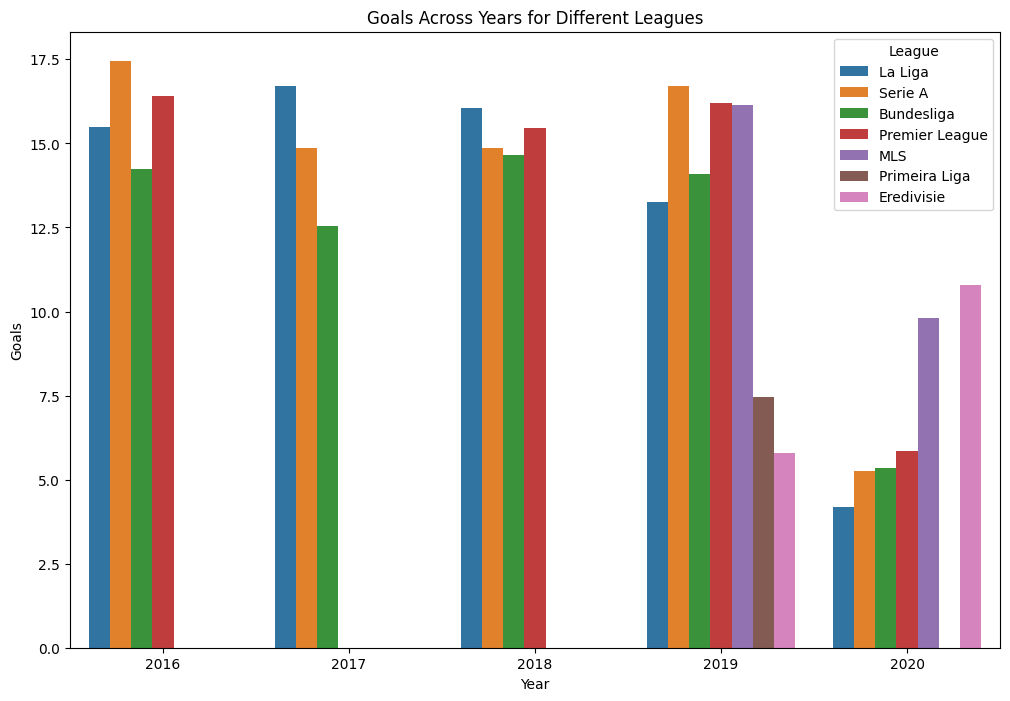

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Year' column if it exists
average_df_reset = average_df.drop(columns='Year', errors='ignore').reset_index()

# Filter the DataFrame for the 'Goals' column
goals_df = average_df_reset[['Year', 'League', 'Goals']]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Goals', hue='League', data=goals_df)
plt.title('Goals Across Years for Different Leagues')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.show()


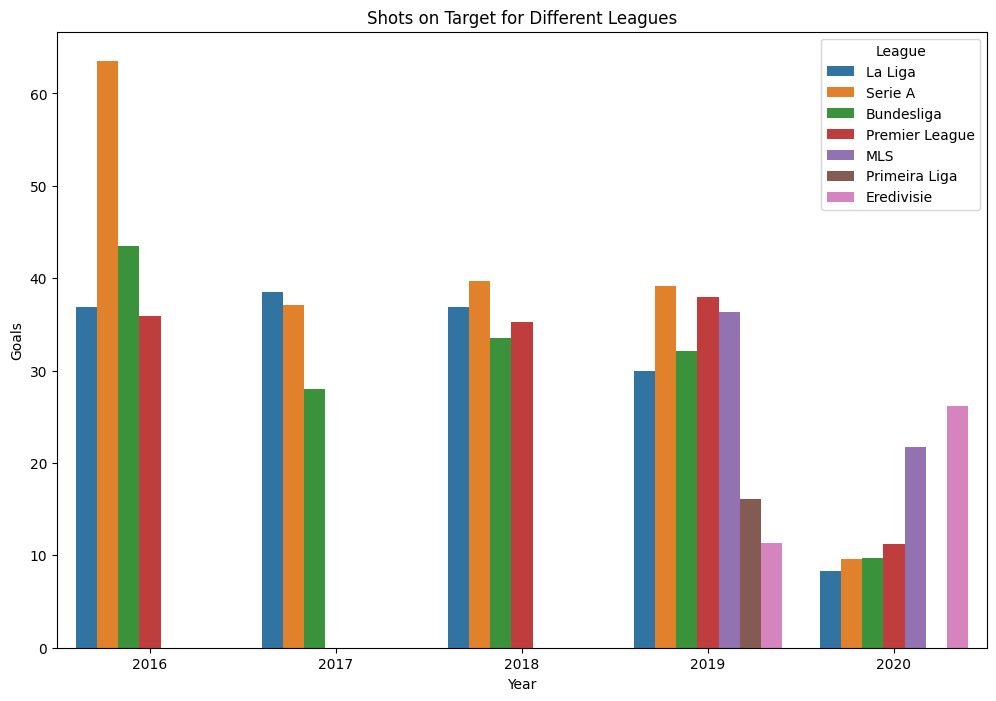

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Year' column if it exists
average_df_reset = average_df.drop(columns='Year', errors='ignore').reset_index()

# Filter the DataFrame for the 'Goals' column
goals_df = average_df_reset[['Year', 'League', 'OnTarget']]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='OnTarget', hue='League', data=goals_df)
plt.title('Shots on Target for Different Leagues')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.show()



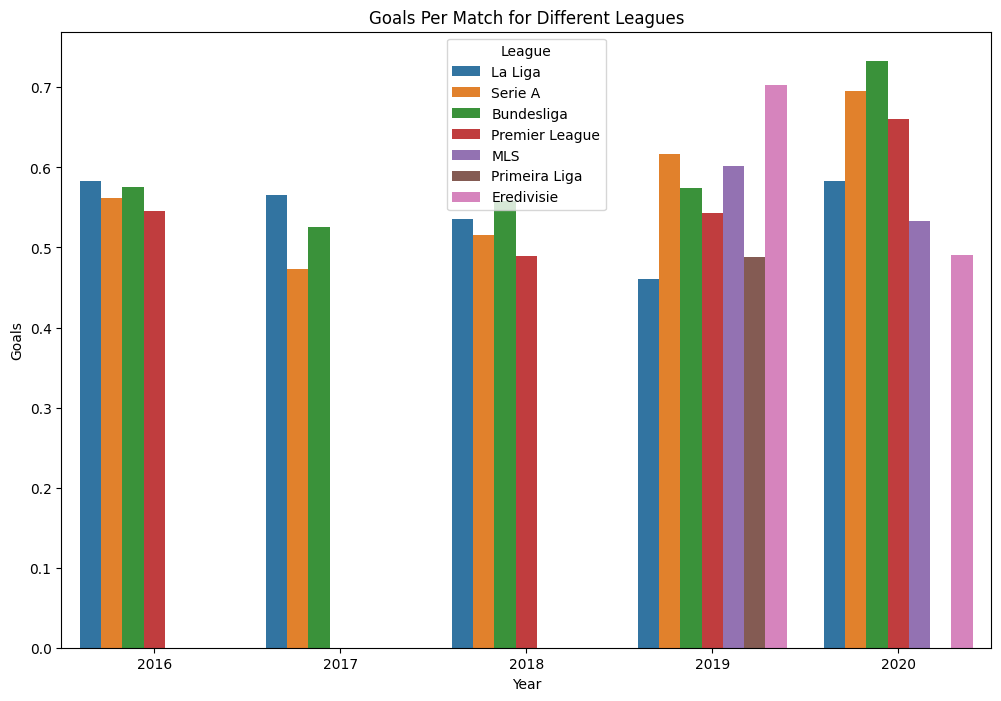

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Year' column if it exists
average_df_reset = average_df.drop(columns='Year', errors='ignore').reset_index()

# Filter the DataFrame for the 'Goals' column
goals_df = average_df_reset[['Year', 'League', 'Goals_Per_Match']]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Goals_Per_Match', hue='League', data=goals_df)
plt.title('Goals Per Match for Different Leagues')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.show()


Comparision between the GOAT

In [23]:
cr7_data = df.loc[df['Player Names'] == 'Cristiano Ronaldo']
cr7_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
203,Italy,Serie A,(JUV),Cristiano Ronaldo,30,1,2857,21,21.65,0.72,177,68,5.89,2.26,2018
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
553,Italy,Serie A,(JUV),Cristiano Ronaldo,5,1,397,8,5.31,1.27,26,13,6.22,3.11,2020


In [24]:
Messi_data = df.loc[df['Player Names'] == 'Lionel Messi']
Messi_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
107,Spain,La Liga,(BAR),Lionel Messi,32,4,3123,33,32.54,0.99,197,95,5.99,2.89,2017
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018
333,Spain,La Liga,(BAR),Lionel Messi,32,1,3067,25,21.63,0.67,159,68,4.93,2.11,2019
528,Spain,La Liga,(BAR),Lionel Messi,8,1,824,4,5.46,0.63,39,19,4.50,2.19,2020


In [25]:
goat_data=pd.concat([cr7_data,Messi_data])
goat_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
203,Italy,Serie A,(JUV),Cristiano Ronaldo,30,1,2857,21,21.65,0.72,177,68,5.89,2.26,2018
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
553,Italy,Serie A,(JUV),Cristiano Ronaldo,5,1,397,8,5.31,1.27,26,13,6.22,3.11,2020
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
107,Spain,La Liga,(BAR),Lionel Messi,32,4,3123,33,32.54,0.99,197,95,5.99,2.89,2017
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018
333,Spain,La Liga,(BAR),Lionel Messi,32,1,3067,25,21.63,0.67,159,68,4.93,2.11,2019
528,Spain,La Liga,(BAR),Lionel Messi,8,1,824,4,5.46,0.63,39,19,4.50,2.19,2020


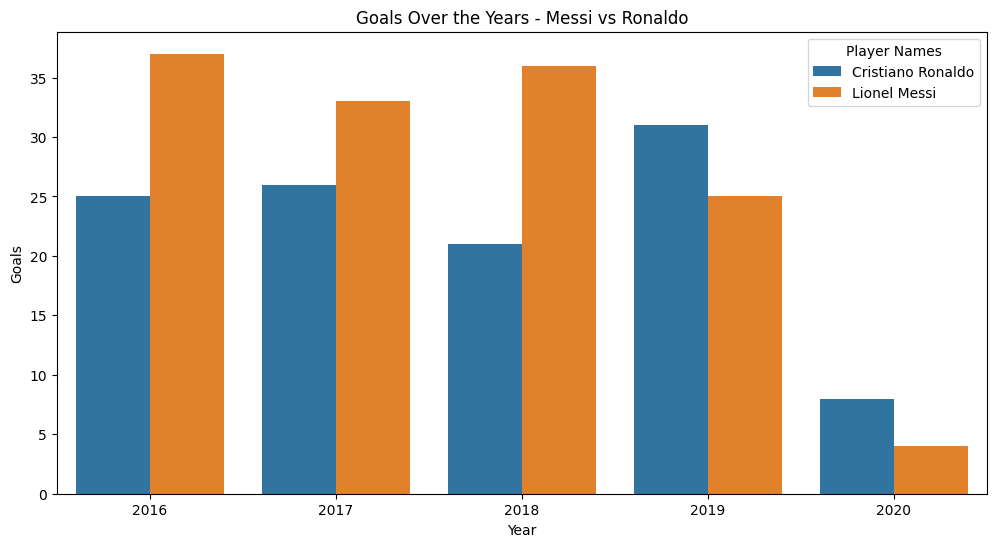

In [26]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Goals', hue='Player Names', data=goat_data)
plt.title('Goals Over the Years - Messi vs Ronaldo')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.legend(title='Player Names')

# Show the plot
plt.show()

Comparing the top Players across all the league on different attributes

In [27]:
x = df["Player Names"].value_counts() == 5
players_5years = x[x].index
players_5years

Index(['Andrea Belotti', 'Lionel Messi', 'Luis Suarez', 'Andrej Kramaric',
       'Ciro Immobile', 'Cristiano Ronaldo', 'Robert Lewandowski',
       'Timo Werner', 'Iago Aspas', 'Fabio Quagliarella'],
      dtype='object', name='Player Names')

In [28]:
df_top = df[df['Player Names'].isin(players_5years)]
df_top.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016
8,Spain,La Liga,(CEL),Iago Aspas,25,7,2354,19,13.88,0.56,78,37,3.15,1.49,2016
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
22,Italy,Serie A,(LAZ),Ciro Immobile,35,1,3294,22,19.76,0.57,136,98,3.92,2.83,2016


In [29]:
df_top["Goals_xG_Diff"] = df_top['Goals'] - df_top['xG']
df_top["Target_Accuracy_Per_Game"] = (df_top['On Target Per Avg Match']/df_top['Shots Per Avg Match'])*100
df_top["Shots_to_Goal_conversion"] = (df_top['Goals']/df_top['OnTarget'])*100
df_top.head()

/tmp/ipykernel_42/2270250522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["Goals_xG_Diff"] = df_top['Goals'] - df_top['xG']
/tmp/ipykernel_42/2270250522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["Target_Accuracy_Per_Game"] = (df_top['On Target Per Avg Match']/df_top['Shots Per Avg Match'])*100
/tmp/ipykernel_42/2270250522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goals_xG_Diff,Target_Accuracy_Per_Game,Shots_to_Goal_conversion
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,4.79,47.422680,49.122807
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016,0.32,36.986301,41.666667
8,Spain,La Liga,(CEL),Iago Aspas,25,7,2354,19,13.88,0.56,78,37,3.15,1.49,2016,5.12,47.301587,51.351351
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016,10.35,42.465753,48.684211
22,Italy,Serie A,(LAZ),Ciro Immobile,35,1,3294,22,19.76,0.57,136,98,3.92,2.83,2016,2.24,72.193878,22.448980


In [30]:
df_top_players = df_top.groupby(by=["Player Names"])[["Matches_Played", "Goals", "Mins", "OnTarget"]].sum().reset_index()
df_top_players.head()


,Player Names,Matches_Played,Goals,Mins,OnTarget
0,Andrea Belotti,142,74,13596,205
1,Andrej Kramaric,97,63,9312,175
2,Ciro Immobile,141,107,13081,279
3,Cristiano Ronaldo,124,111,11390,296
4,Fabio Quagliarella,139,73,12270,217


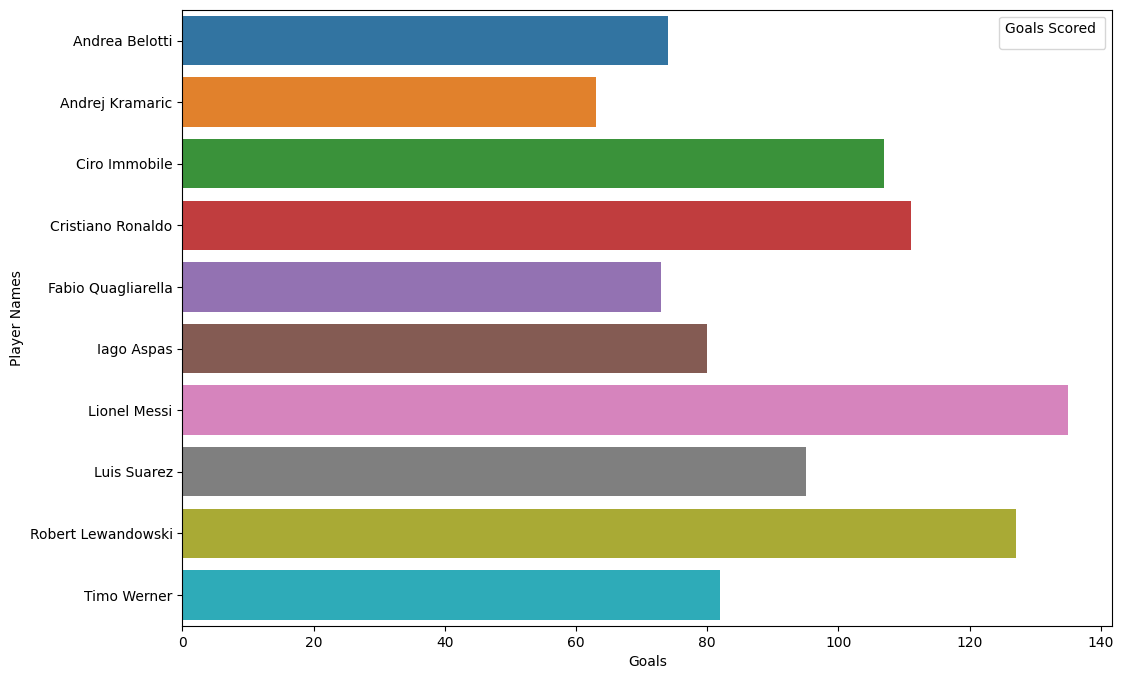

In [31]:
plt.figure(figsize=(12,8))
df_goals_scored=df_top_players.sort_values(by=['Goals'],ascending=True)
vis=sns.barplot(x='Goals',y='Player Names',data=df_top_players)
vis.set_xlabel('Goals')
vis.set_ylabel('Player Names')
vis.legend(title='Goals Scored ')

In [32]:
df_top_players["Mins_per_goal"] = df_top_players['Mins']/df_top_players['Goals']
df_top_players["Mins_per_Target"] = df_top_players['Mins']/df_top_players['OnTarget']
df_top_players.head()

,Player Names,Matches_Played,Goals,Mins,OnTarget,Mins_per_goal,Mins_per_Target
0,Andrea Belotti,142,74,13596,205,183.729730,66.321951
1,Andrej Kramaric,97,63,9312,175,147.809524,53.211429
2,Ciro Immobile,141,107,13081,279,122.252336,46.885305
3,Cristiano Ronaldo,124,111,11390,296,102.612613,38.479730
4,Fabio Quagliarella,139,73,12270,217,168.082192,56.543779


In [33]:
df_top_Players_by_mins_shot = df_top_players.sort_values(by=['Mins_per_Target'], ascending=False)

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=df_top_Players_by_mins_shot['Mins_per_Target'],
            y=df_top_Players_by_mins_shot['Player Names'],
            orientation='h'))

fig.show()

In [34]:
df_top_Players_by_gal_per_min = df_top_players.sort_values(by=['Mins_per_goal'], ascending=False)

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=df_top_Players_by_gal_per_min['Mins_per_goal'],
            y=df_top_Players_by_gal_per_min['Player Names'],
            orientation='h'))

fig.show()

The following graph is basically difference between Goals and Expected Goals plotted in all 5 years. The winner of this category is one who has performed best over the years than what was expected.

In [35]:
fig = go.Figure()
Goals_diff_sum = {}
Goals_diff_mean = {}
for i in players_5years:
    df_player = df_top[df_top['Player Names'].isin([i])]
    Goals_diff_sum[i] = df_player['Goals_xG_Diff'].sum()
    Goals_diff_mean[i] = df_player['Goals_xG_Diff'].mean()
    fig.add_trace(go.Scatter(x=df_player['Year'], y=df_player["Goals_xG_Diff"],
                    mode='lines+markers',
                    name=i))
fig.update_layout(
    autosize=False,
    width=900,
    height=600,)

fig.show()

In [37]:
Average_TA_deviation = {}
Mean_TA = {}
fig = go.Figure()

for i in players_5years:
    df_player = df_top[df_top['Player Names'].isin([i])]
    Average_TA_deviation[i] = df_player['Target_Accuracy_Per_Game'].pct_change().mean()*100
    Mean_TA[i] = df_player['Target_Accuracy_Per_Game'].mean()
    fig.add_trace(go.Scatter(x=df_player['Year'], y=df_player["Target_Accuracy_Per_Game"],
                    mode='lines+markers',
                    name=i))
fig.update_layout(
    autosize=False,
    width=900,
    height=600,)

fig.show()